# !!This is A Face Mask Detection Project!!

How to approch the Project 
## Introduction

The Dataset is Downloaded from Kaggle, [Face Mask Detection](https://www.kaggle.com/datasets/wobotintelligence/face-mask-detection-dataset/data). The dataset comprises labeled images indicating various types of face masks or lack thereof. Each row contains the following information: the image file name, **bounding box coordinates (x1, y1, x2, y2)** that define the region of interest, and the label describing the type of object detected (e.g., face with mask, mask colorful, face no mask, hat).

The columns x1, y1, x2, and y2 represent the coordinates of the bounding box that encloses the detected object in an image. Here is a breakdown of what each coordinate represents:


x1: The x-coordinate of the top-left corner of the bounding box.  
y1: The y-coordinate of the top-left corner of the bounding box. 

x2: The x-coordinate of the bottom-right corner of the bounding box.   
y2: The y-coordinate of the bottom-right corner of the bounding box.   

These coordinates define the rectangular area within the image where the object (e.g., a face with a mask, a colorful mask, or no mask) is located.

   
3. Load the Data
4. Visualize the Data 

## Load The Data

**Load the Train Data**

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("Dataset//train.csv") #train.csv contains the name of the images only. 

In [3]:
df.head()

name   x1   x2   y1   y2       classname
0  2756.png   69  126  294  392  face_with_mask
1  2756.png  505   10  723  283  face_with_mask
2  2756.png   75  252  264  390   mask_colorful
3  2756.png  521  136  711  277   mask_colorful
4  6098.jpg  360   85  728  653    face_no_mask

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15412 entries, 0 to 15411
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       15412 non-null  object
 1   x1         15412 non-null  int64 
 2   x2         15412 non-null  int64 
 3   y1         15412 non-null  int64 
 4   y2         15412 non-null  int64 
 5   classname  15412 non-null  object
dtypes: int64(4), object(2)
memory usage: 722.6+ KB


The df Dataset contains 15412 rows and 6 coulmns. 

To know the Data, I run some code and see what the Data Contains.

In [5]:
print(f"Total categories/Classes in classname columns:\n\n{df['classname'].unique()}"),

print(f"\nCount of each categories/classes {df['classname'].value_counts()} ") 

Total categories/Classes in classname columns:

['face_with_mask' 'mask_colorful' 'face_no_mask'
 'face_with_mask_incorrect' 'mask_surgical' 'face_other_covering'
 'scarf_bandana' 'eyeglasses' 'helmet' 'face_shield' 'sunglasses' 'hood'
 'hat' 'goggles' 'hair_net' 'hijab_niqab' 'other' 'gas_mask'
 'balaclava_ski_mask' 'turban']

Count of each categories/classes classname
face_with_mask              4180
mask_surgical               2430
mask_colorful               1876
face_no_mask                1569
face_other_covering         1372
eyeglasses                   914
hat                          823
sunglasses                   358
hair_net                     287
scarf_bandana                260
goggles                      192
helmet                       187
hijab_niqab                  173
face_shield                  160
hood                         159
face_with_mask_incorrect     150
balaclava_ski_mask           134
turban                        94
gas_mask                      55


In [6]:
df.describe()

x1            x2            y1            y2
count  15412.000000  15412.000000  15412.000000  15412.000000
mean     343.696016    155.338373    531.480535    346.346224
std      312.239316    170.595556    398.407997    287.384566
min        0.000000      0.000000     13.000000     13.000000
25%      155.000000     52.000000    336.000000    194.000000
50%      279.000000    126.000000    462.000000    285.000000
75%      439.000000    211.000000    613.000000    419.000000
max     3598.000000   3549.000000   4912.000000   4370.000000

In [7]:
df.describe(include="all")

name            x1            x2            y1            y2  \
count      15412  15412.000000  15412.000000  15412.000000  15412.000000   
unique      4326           NaN           NaN           NaN           NaN   
top     1914.jpg           NaN           NaN           NaN           NaN   
freq          37           NaN           NaN           NaN           NaN   
mean         NaN    343.696016    155.338373    531.480535    346.346224   
std          NaN    312.239316    170.595556    398.407997    287.384566   
min          NaN      0.000000      0.000000     13.000000     13.000000   
25%          NaN    155.000000     52.000000    336.000000    194.000000   
50%          NaN    279.000000    126.000000    462.000000    285.000000   
75%          NaN    439.000000    211.000000    613.000000    419.000000   
max          NaN   3598.000000   3549.000000   4912.000000   4370.000000   

             classname  
count            15412  
unique              20  
top     face_with_mask  
freq              4180  
mean               NaN  
std                NaN  
min                NaN  
25%                NaN  
50%                NaN  
75%                NaN  
max                NaN

In [8]:
df['name'].value_counts()

name
1914.jpg    37
4943.png    32
2422.png    32
3468.png    28
4141.png    27
            ..
5707.jpg     1
5665.jpg     1
5524.jpg     1
5533.jpg     1
5856.jpg     1
Name: count, Length: 4326, dtype: int64

In [9]:
df.loc[:,df.columns!="classname"]

name   x1   x2   y1   y2
0      2756.png   69  126  294  392
1      2756.png  505   10  723  283
2      2756.png   75  252  264  390
3      2756.png  521  136  711  277
4      6098.jpg  360   85  728  653
...         ...  ...  ...  ...  ...
15407  1894.jpg  437  121  907  644
15408  1894.jpg  557  363  876  636
15409  1894.jpg  411    3  940  325
15410  3216.png  126   69  409  463
15411  3216.png  136  289  393  461

[15412 rows x 5 columns]

***Loading the Test Data***

In [10]:
df_test= pd.read_csv("Dataset/submission.csv") 

In [11]:
df_test.loc[:5,['name','classname']]

name  classname
0  1800.jpg        NaN
1  1800.jpg        NaN
2  1800.jpg        NaN
3  1799.jpg        NaN
4  1799.jpg        NaN
5  1799.jpg        NaN

***Loading the JSON files and Images***

In [12]:
json_dir="Dataset/Medical mask/Medical mask/Medical Mask/annotations"

image_dir='Dataset/Medical mask/Medical mask/Medical Mask/images'

## Creating Useful Function 

Created JSON Function, Which is usefull in reteriving the Data from the json files stored in a different folder. 

In [13]:
import json
import os

In [14]:
def json_data(json_path):
    """This is a function that is designed to open a file that contains JSON(JavaScript Object Notation) format
    and read its content.
    """
    with open(json_path, 'r') as f: 
        return json.load(f) 

In [15]:
jsonfiles=[]

for i in os.listdir(json_dir):                  # os.listdir, lists all the files in the specified directory. 
    jsonfiles.append(json_data(os.path.join(json_dir,i)))

In [16]:
jsonfiles[0].get("Annotations")

[{'isProtected': False,
  'ID': 924868908868875136,
  'BoundingBox': [451, 186, 895, 697],
  'classname': 'face_no_mask',
  'Confidence': 1,
  'Attributes': {}}]

## Data Preprocessing 

In [17]:
import cv2
import random

data=[]
img_size=124
mask=['face_with_mask']
no_mask=['face_no_mask']
labels={'mask':0, 'without mask': 1}


for i in df['name'].unique():
    f=i + '.json'

    for j in json_data(os.path.join(json_dir,f)).get('Annotations'):
        if j['classname'] in mask:
            x1,y1,x2,y2= j['BoundingBox']
            img = cv2.imread(os.path.join(image_dir,i),1)
            img= img[y1:y2, x1:x2]
            img= cv2.resize(img,(img_size, img_size))
            data.append([img,labels['mask']])

        if j['classname'] in no_mask:
            x1,y1,x2,y2= j['BoundingBox']
            img = cv2.imread(os.path.join(image_dir,i),1)
            img= img[y1:y2, x1:x2]
            img= cv2.resize(img,(img_size, img_size))
            data.append([img,labels['without mask']])

random.shuffle(data)


In [18]:
data

[[array([[[110, 111, 112],
          [111, 114, 115],
          [109, 115, 114],
          ...,
          [ 97,  94,  90],
          [ 96,  95,  91],
          [101, 100,  96]],
  
         [[112, 116, 117],
          [113, 116, 118],
          [112, 114, 123],
          ...,
          [ 96,  93,  89],
          [ 99,  95,  94],
          [ 97,  93,  92]],
  
         [[116, 116, 122],
          [107, 112, 120],
          [109, 122, 130],
          ...,
          [ 98,  96,  92],
          [ 98,  94,  93],
          [ 81,  77,  76]],
  
         ...,
  
         [[ 56,  34,  23],
          [ 49,  30,  17],
          [ 45,  28,  15],
          ...,
          [ 46,  24,  12],
          [ 47,  25,  13],
          [ 52,  28,  15]],
  
         [[ 49,  31,  19],
          [ 52,  34,  21],
          [ 48,  31,  18],
          ...,
          [ 46,  24,  12],
          [ 49,  29,  16],
          [ 52,  28,  16]],
  
         [[ 45,  31,  17],
          [ 49,  33,  20],
          [ 47,  29,  18

In [19]:
import seaborn as sns 

p = []
for face in data:
    if(face[1] == 0):
        p.append("Mask")
    else:
        p.append("No Mask")

<Axes: ylabel='count'>

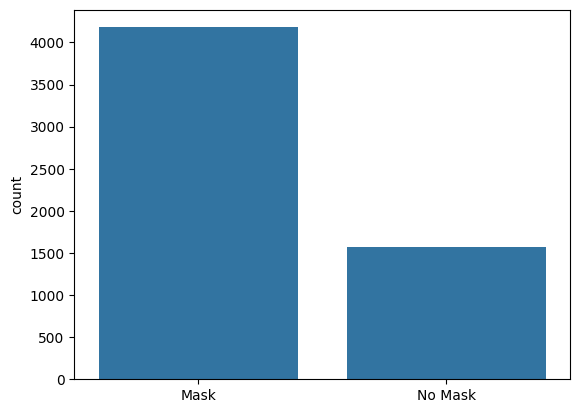

In [20]:
sns.countplot(x=p)

## Training A Neural Network Model For Face Mask Detection

In [21]:
X = [] # it would contain 5749 images.  
Y = [] # it would contain 5749 labels for the image 


for features,label in data:
    X.append(features)                        # pixel values for each image 
    Y.append(label)                           # label values for each image   

In [22]:
X

[array([[[110, 111, 112],
         [111, 114, 115],
         [109, 115, 114],
         ...,
         [ 97,  94,  90],
         [ 96,  95,  91],
         [101, 100,  96]],
 
        [[112, 116, 117],
         [113, 116, 118],
         [112, 114, 123],
         ...,
         [ 96,  93,  89],
         [ 99,  95,  94],
         [ 97,  93,  92]],
 
        [[116, 116, 122],
         [107, 112, 120],
         [109, 122, 130],
         ...,
         [ 98,  96,  92],
         [ 98,  94,  93],
         [ 81,  77,  76]],
 
        ...,
 
        [[ 56,  34,  23],
         [ 49,  30,  17],
         [ 45,  28,  15],
         ...,
         [ 46,  24,  12],
         [ 47,  25,  13],
         [ 52,  28,  15]],
 
        [[ 49,  31,  19],
         [ 52,  34,  21],
         [ 48,  31,  18],
         ...,
         [ 46,  24,  12],
         [ 49,  29,  16],
         [ 52,  28,  16]],
 
        [[ 45,  31,  17],
         [ 49,  33,  20],
         [ 47,  29,  18],
         ...,
         [ 48,  25,  14],
  

In [23]:
X=np.array(X)/ 255.0 # normalizing the Data or scaled the data in the range from 0 to 1. 
X

array([[[[0.43137255, 0.43529412, 0.43921569],
         [0.43529412, 0.44705882, 0.45098039],
         [0.42745098, 0.45098039, 0.44705882],
         ...,
         [0.38039216, 0.36862745, 0.35294118],
         [0.37647059, 0.37254902, 0.35686275],
         [0.39607843, 0.39215686, 0.37647059]],

        [[0.43921569, 0.45490196, 0.45882353],
         [0.44313725, 0.45490196, 0.4627451 ],
         [0.43921569, 0.44705882, 0.48235294],
         ...,
         [0.37647059, 0.36470588, 0.34901961],
         [0.38823529, 0.37254902, 0.36862745],
         [0.38039216, 0.36470588, 0.36078431]],

        [[0.45490196, 0.45490196, 0.47843137],
         [0.41960784, 0.43921569, 0.47058824],
         [0.42745098, 0.47843137, 0.50980392],
         ...,
         [0.38431373, 0.37647059, 0.36078431],
         [0.38431373, 0.36862745, 0.36470588],
         [0.31764706, 0.30196078, 0.29803922]],

        ...,

        [[0.21960784, 0.13333333, 0.09019608],
         [0.19215686, 0.11764706, 0.06666667]

In [24]:
X = X.reshape(-1,124,124,3)  # reshaping the array to have four dimesions , -1 refers to calculate the dimesions which is 5749 images.
X.shape

(5749, 124, 124, 3)

Here, 5749 means that we have 5749 images. Each image is **124 rows(width) , 124 columns(height) and 3 RGB values.**
when we select {X[0]} , it would select the first image thus the shape would be (124,124,3) which means that the first image is of 124 * 124 pixel with three coulmns, where the Three coulmns refer to RGB (Red, Green, Blue) values and , if we select {X[0][0]} that is the first row of the first image and **{X[0][0][0]}** this select the **First pixel of the first image** containing only three RGB values.

In [25]:
Y = np.array(Y)

**Model**

In [26]:
from keras.models import Sequential
from keras import optimizers
from keras import backend as K
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [27]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding = "same", activation='relu', input_shape=(124,124,3))) #First convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))    # second convolutional layer
model.add(Conv2D(128, (3, 3), activation='relu'))   # third convolutional layer
model.add(MaxPooling2D(pool_size=(2,2)))            # max pooling layer with a size of 2*2
model.add(Dropout(0.25))                            #dropot rate is 25%
 
model.add(Flatten())                                # tramsforming the 2d matrix of features into a 1D vector.
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))             # First Dense layer(Hidden layer)
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))           # Output layer




c:\Users\princ\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 124, 124, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 122, 122, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 120, 120, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 60, 60, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 60, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 460800)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 460800)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 50)             │    23,040,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,133,349 (88.25 MB)

 Trainable params: 23,133,349 (88.25 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

xtrain, xval, ytrain, yval = train_test_split(X, Y, train_size=0.8, random_state=0)
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False)
datagen.fit(xtrain)

# Train the model using the data generator
history = model.fit(
    datagen.flow(xtrain, ytrain, batch_size=32),
    steps_per_epoch=xtrain.shape[0] // 32,
    epochs=50,
    verbose=1,
    validation_data=(xval, yval)
)

Epoch 1/5


c:\Users\princ\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


143/143 ━━━━━━━━━━━━━━━━━━━━ 267s 2s/step - accuracy: 0.7091 - loss: 1.1137 - val_accuracy: 0.8687 - val_loss: 0.3252
Epoch 2/5
  1/143 ━━━━━━━━━━━━━━━━━━━━ 4:11 2s/step - accuracy: 0.8125 - loss: 0.4569

c:\Users\princ\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


143/143 ━━━━━━━━━━━━━━━━━━━━ 20s 128ms/step - accuracy: 0.8125 - loss: 0.4569 - val_accuracy: 0.8670 - val_loss: 0.3276
Epoch 3/5
143/143 ━━━━━━━━━━━━━━━━━━━━ 309s 2s/step - accuracy: 0.8424 - loss: 0.3697 - val_accuracy: 0.8948 - val_loss: 0.2613
Epoch 4/5
143/143 ━━━━━━━━━━━━━━━━━━━━ 23s 149ms/step - accuracy: 0.7812 - loss: 0.4659 - val_accuracy: 0.8913 - val_loss: 0.2594
Epoch 5/5
143/143 ━━━━━━━━━━━━━━━━━━━━ 291s 2s/step - accuracy: 0.8625 - loss: 0.3319 - val_accuracy: 0.9130 - val_loss: 0.2337


**Testing the model on the Real Time Video**

In [30]:
import matplotlib.pyplot as plt

In [31]:
y_pred = model.predict(xval)
y_pred_classes = (y_pred > 0.5).astype("int32")

36/36 ━━━━━━━━━━━━━━━━━━━━ 20s 565ms/step


In [32]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(yval, y_pred_classes)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9130434782608695


**Test on the Images**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


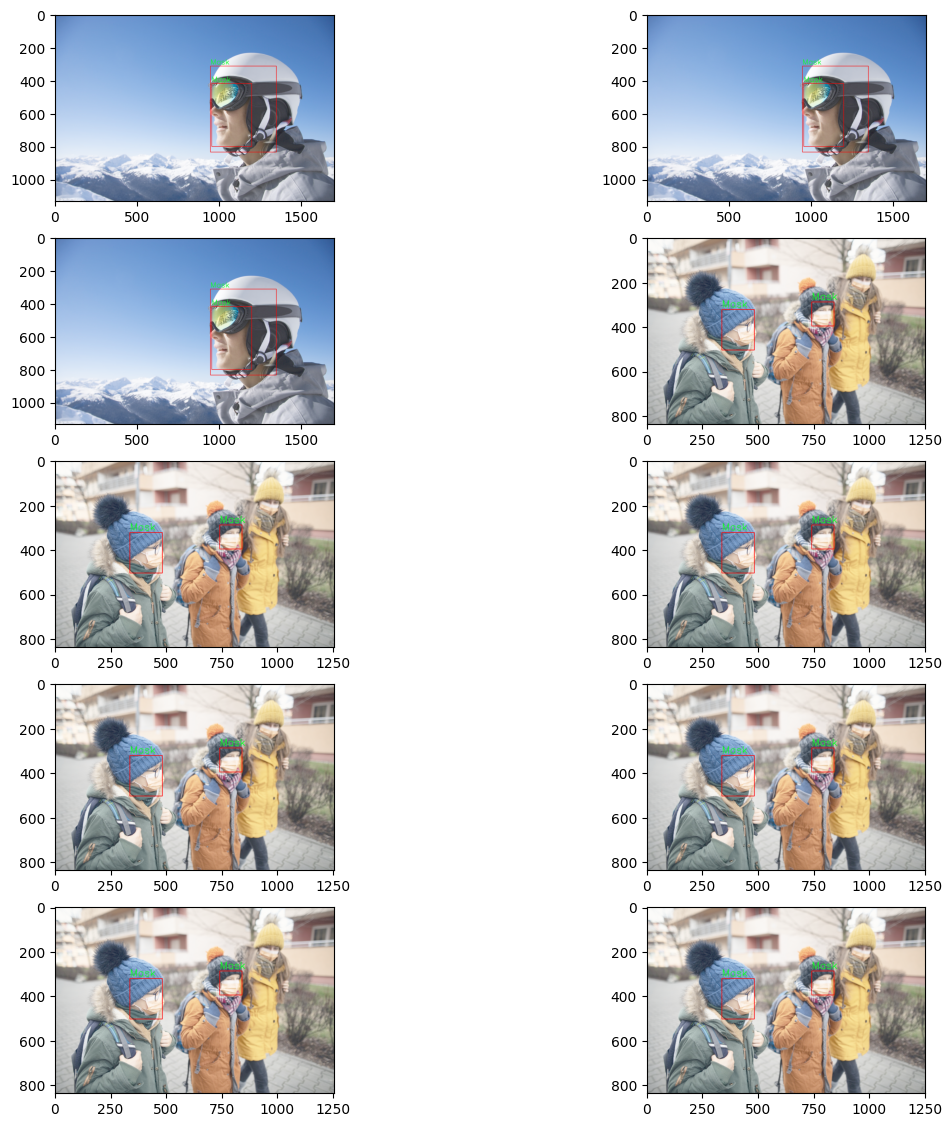

In [50]:
##test_images = ['1114.png','1504.jpg', '0072.jpg','0012.jpg','0353.jpg','1374.jpg']
#
## Function to adjust gamma
#def adjust_gamma(image, gamma=1.0):
#    invGamma = 1.0 / gamma
#    table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)])
#    return cv2.LUT(image.astype(np.uint8), table.astype(np.uint8))
#
#cvNet = cv2.dnn.readNetFromCaffe('deploy.prototxt.txt','res10_300x300_ssd_iter_140000.caffemodel')
#gamma = 2.0  
#
#'''
#it is used for gamma correction if it is less than 1 then it makes the image darker 
#and if it is more than one it makes image beighter.
#'''
#
## fig with a size of 14*14 inche and specifying that there will be 3 rows and 2 columns of subplots.
#fig = plt.figure(figsize = (14,14))
#rows = 5
#cols = 2
#
#
#axes = []
#assign = {'0':'Mask','1':"No Mask"}
#
#
#for j,im in enumerate(df_test['name'].head(10)):
#    image =  cv2.imread(os.path.join(image_dir,im),1) # read the image in color mode
#    image =  adjust_gamma(image, gamma=gamma) # adjusting gamma of the image 
#    
#    (h, w) = image.shape[:2]  # it gives us the images height and width
#    #creating the blob , a format that neural network can process
#    blob = cv2.dnn.blobFromImage(cv2.resize(image, (300,300)), 1.0, (300, 300), (104.0, 177.0, 123.0))
#    
#    cvNet.setInput(blob) # input for neural network
#    detections = cvNet.forward() # performing a forword pass, performing face detection
#    
#    for i in range(0, detections.shape[2]):
#        try:
#            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
#            (startX, startY, endX, endY) = box.astype("int")
#            frame = image[startY:endY, startX:endX]
#            confidence = detections[0, 0, i, 2]
#            if confidence > 0.2:
#                im = cv2.resize(frame,(img_size,img_size))
#                im = np.array(im)/255.0
#                im = im.reshape(1,124,124,3)
#                result = model.predict(im)
#                if result>0.5:
#                    label_Y = 1
#                    color = (0, 255, 0)
#                    
#                else:
#                    label_Y = 0
#                    color = (0, 0, 255)
#                    
#                cv2.rectangle(image, (startX, startY), (endX, endY), (0, 0, 255), 2)
#                cv2.putText(image,assign[str(label_Y)] , (startX, startY-10), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (36,255,12), 2)
#        
#        except:pass
#    axes.append(fig.add_subplot(rows, cols, j+1))
#    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
#plt.show()

In [ ]:
import numpy as np
import cv2

# Function to adjust gamma
def adjust_gamma(image, gamma=1.0):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)])
    return cv2.LUT(image.astype(np.uint8), table.astype(np.uint8))

# Load the pre-trained Caffe model
cvNet = cv2.dnn.readNetFromCaffe('deploy.prototxt.txt','res10_300x300_ssd_iter_140000.caffemodel')

# Function to detect face mask
def detect_face_mask(img):
    img_resized = cv2.resize(img, (124, 124))
    img_normalized = img_resized / 255.0
    img_reshaped = img_normalized.reshape(1, 124, 124, 3)
    y_pred = model.predict(img_reshaped)
    return int(y_pred[0][0] > 0.5)  # Assuming a binary classification with a threshold of 0.5

# Open video capture
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    
    if not ret:
        break

    # Adjust gamma
    frame_gamma = adjust_gamma(frame, gamma=2.0)
    
    # Get frame dimensions
    (h, w) = frame.shape[:2]
    
    # Prepare the frame for face detection
    blob = cv2.dnn.blobFromImage(cv2.resize(frame_gamma, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))
    
    # Detect faces
    cvNet.setInput(blob)
    detections = cvNet.forward()
    
    # Loop over the detections
    for i in range(0, detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        
        if confidence > 0.2:
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (startX, startY, endX, endY) = box.astype("int")
            
            # Extract the face ROI
            face = frame[startY:endY, startX:endX]
            
            # Detect mask on the face
            label_Y = detect_face_mask(face)
            label = "Mask" if label_Y == 0 else "No Mask"
            color = (0, 255, 0) if label_Y == 0 else (0, 0, 255)
            
            # Draw bounding box and label
            cv2.rectangle(frame, (startX, startY), (endX, endY), color, 2)
            cv2.putText(frame, label, (startX, startY - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.5, color, 2)
    
    # Display the frame
    cv2.imshow('Face Mask Detection', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('x'):
        break

cap.release()
cv2.destroyAllWindows()


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(yval, y_pred_classes)
recall = recall_score(yval, y_pred_classes)
f1 = f1_score(yval, y_pred_classes)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(yval, y_pred_classes)
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

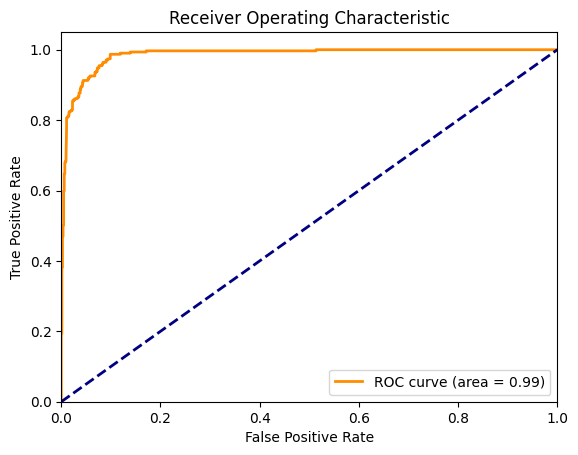

In [48]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(yval, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()